In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [13]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Intensity/CSV/Harris_With_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-13-ca7924a54fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-13-ca7924a54fb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.001959,0.001393,0.002599,0.000752,0.000272,0.000282,0.000239,0.000177,0.000081,0.000001,...,0.004123,0.003547,0.002460,0.003793,0.009635,0.004550,0.004233,0.004898,0.001733,1
1,0.120952,0.114808,0.152517,0.145615,0.134129,0.205680,0.264750,0.278481,0.279001,0.358579,...,0.462320,0.378615,0.307700,0.372019,0.078879,0.055815,0.192440,0.232530,0.217166,1
2,0.032240,0.041921,0.029113,0.039740,0.048271,0.014200,0.015545,0.023968,0.028138,0.038903,...,0.193605,0.147798,0.100960,0.095003,0.196983,0.085734,0.047497,0.022360,0.029682,1
3,0.146389,0.047551,0.027800,0.019516,0.030474,0.139281,0.047098,0.025817,0.018104,0.028023,...,0.045285,0.111417,0.010543,0.012759,0.011528,0.017618,0.215629,0.042168,0.020227,1
4,0.042750,0.192896,0.010326,0.007873,0.241848,0.019798,0.006421,0.418650,0.005771,0.005337,...,0.226088,0.018410,0.009965,0.216423,0.001715,0.001734,0.114168,0.008468,0.007153,1


In [14]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [15]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7083333333333334
              precision    recall  f1-score   support

          -1       0.83      0.76      0.79        88
           1       0.46      0.56      0.51        32

    accuracy                           0.71       120
   macro avg       0.64      0.66      0.65       120
weighted avg       0.73      0.71      0.72       120



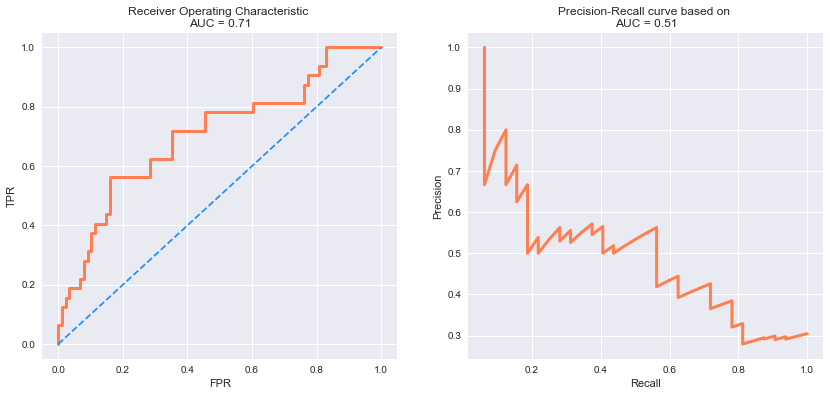

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()